In [1]:
import numpy as np
import scipy
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb
from sklearn.metrics import mean_squared_error

import sklearn.tree

from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import KFold

from sklearn.metrics import r2_score

import uproot
import ROOT
from array import array

Welcome to JupyROOT 6.22/02


In [3]:
#from numpy.random import seed
#import random as python_random
#number = 1
#seed(number)
#python_random.seed(number)

In [4]:
#variables_test = (["n30", "n35", "n40", "n45", "n50", "n55", "n60", "n65", "n70", "n75", "n80", "nav", "c30", 
#"c35", "c40", "c45", "c50", "c55", "c60", "c65", "c70", "c75", "c80", ])
#branches = [ "energy", "eecal", "ehcal", "nhits", "nhits_ecal", "nhits_hcal", "time", "etime", "htime", "radius", 
#"eradius", "hradius", "elayer", "hlayer", "energy_hit", "energy_hit_ecal", "energy_hit_hcal", 
#"energy_hit_ecal_max", "energy_hit_hcal_max", "muon_energy", "muon_energy_hit", "muon_nhits", "muon_time", 
#"muon_layer" ]

#branches = [ "energy", "eecal", "ehcal", "nhits", "nhits_ecal", "nhits_hcal", "radius", "eradius", "hradius", 
#"time", "etime", "htime", "elayer", "hlayer", "energy_hit", "energy_hit_ecal", "energy_hit_hcal", 
#"energy_hit_ecal_max", "energy_hit_hcal_max", "muon_energy", "muon_energy_hit", "muon_nhits", "muon_time", 
#"muon_layer" ]

#branches = ["energy", "ehcal", "eecal", "nhits", "nhits_ecal", "nhits_hcal", "htime", "radius", "hradius", 
#            "hlayer", "c30", "energy_hit", "energy_hit_hcal", "muon_energy", "muon_energy_hit", "muon_nhits", 
#            "muon_time", "muon_layer"]

branches = ["eecal", "ehcal", "energy_hit_ecal", "energy_hit_hcal", "muon_energy", "muon_energy_hit", 
           "nhits_ecal", "nhits_hcal", "etime", "htime", "eradius", "hradius", "elayer", "hlayer",
           "muon_nhits", "muon_time", "muon_layer"]

In [5]:
# ./gun_k0L_allgev_FTFP_BERT_90000evt_ILD_l5_v02steel.root

fTreeName = "tree"

data = uproot.pandas.iterate("./gun_k0L_allgev_FTFP_BERT_260000evt_ILD_l5_v02steel.root", fTreeName, branches)
data = pd.concat(list(data))

data_mc = uproot.pandas.iterate("./gun_k0L_allgev_FTFP_BERT_260000evt_ILD_l5_v02steel.root", fTreeName, ["mc_energy"])
data_mc = pd.concat(list(data_mc))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, data_mc, train_size = 0.9)
#x_train, x_test, y_train, y_test = train_test_split(data_scaled, data_mc_scaled, train_size = 0.9)
#x = data[data.columns[:2]]

In [7]:
#def loss3(y_true, y_pred):
#    residual = (y_true - y_pred).astype("float")
#    grad = np.where(residual<0, -2*10.0*residual, -2*residual)
#    hess = np.where(residual<0, 2*10.0, 2.0)
#    return grad, hess



#def loss3(y_true, y_pred):
#    return k.mean( k.square( (y_pred - y_true) ) / ( a * y_true) )

In [8]:
#xg_reg = xgb.XGBRegressor(objective = loss3, colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 30, alpha = 10, n_estimators = 100)

xg_reg = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 10, n_estimators = 10)

In [9]:
history = xg_reg.fit(x_train,y_train)

In [10]:
preds = xg_reg.predict(x_test)

In [11]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 16.790770


In [12]:
y_preds = pd.Series(preds, name='y_preds', dtype='float32')

<AxesSubplot:ylabel='Frequency'>

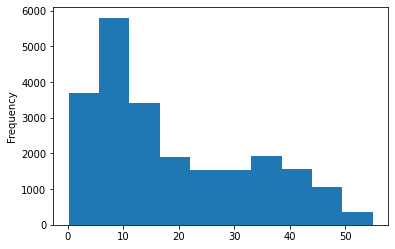

In [13]:
y_preds.plot(kind='hist')

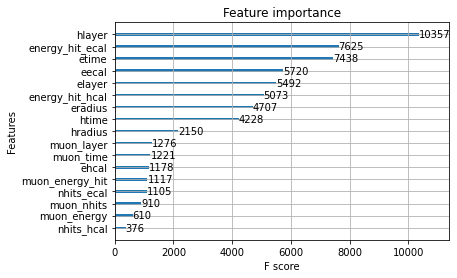

In [14]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
#plt.savefig('aaa')
plt.show()

In [15]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import r2_score
#from sklearn.metrics import make_scorer
#ftwo_scorer = make_scorer(r2_score, beta=2)
#type(ftwo_scorer)
#param_grid = dict(epochs=[10, 20, 30])
#grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=ftwo_scorer, n_jobs=-1, cv=3)
#grid_result = grid.fit(x_train, y_train)



#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
#estimator = KerasRegressor(build_fn=model, nb_epoch=100, batch_size=100, verbose=False)
# Create a KerasClassifier object
#model = KerasRegressor(build_fn = model,
#                       verbose = 0)
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.metrics import r2_score
#from sklearn.metrics import make_scorer
#ftwo_scorer = make_scorer(r2_score, beta=2)
#type(ftwo_scorer)
# Define the parameters to try out
#params = {'activataion': ["relu", "tanh"],
#          'batch_size': [16, 32, 64], 
#          'epochs': [50, 100],
#          'learning_rate': [0.01, 0.001, 0.0001]}
#random_search = RandomizedSearchCV(model,
#                                   param_distributions = params,
#                                   scoring = ftwo_scorer,
#                                   cv = KFold(10))
#random_search_results = random_search.fit(x_train, y_train)

In [16]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import r2_score
#from sklearn.metrics import make_scorer

In [17]:
#ftwo_scorer = make_scorer(r2_score)
#type(ftwo_scorer)

In [18]:
#param_grid = {'epochs': [50, 100, 150, 200],
#          'max_depth': [6, 10, 15, 20, 25, 30, 35, 40],
#          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
#          'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [19]:
#scoring_fit='neg_mean_squared_error'

In [20]:
#grid = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring=scoring_fit, n_jobs=-1, cv=3)

In [21]:
#grid_result = grid.fit(x_train, y_train)

In [22]:
#pred = grid_result.predict(x_test)

In [23]:
#xg_reg.base_score

In [24]:
#pred = pd.Series(pred, name='pred', dtype='float32')

In [25]:
#pred.plot(kind='hist')

In [26]:
#best_params2 = grid.best_params_

In [27]:
#print("Best params2: ")
#for param_name in sorted(best_params2.keys()):
#    print('%s: %r' % (param_name, best_params2[param_name]))

In [28]:
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.metrics import r2_score
#from sklearn.metrics import make_scorer
#ftwo_scorer = make_scorer(r2_score)
#type(ftwo_scorer)
#Define the parameters to try out
#params = {'epochs': [50, 100, 150, 200],
#          'max_depth': [6, 10, 15, 20, 25, 30, 35, 40],
#          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
#          'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
#random_search = RandomizedSearchCV(xg_reg,
#                                   param_distributions = params,
#                                   scoring = ftwo_scorer,
#                                   cv = KFold(10))
#random_search_results = random_search.fit(x_train, y_train)

In [29]:
#pred2 = random_search_results.predict(x_test)

In [30]:
#pred2 = pd.Series(pred2, name='pred2', dtype='float32')

In [31]:
#pred2.plot(kind='hist')

In [32]:
#best_params = random_search.best_params_

In [33]:
#print("Best params: ")
#for param_name in sorted(best_params.keys()):
#    print('%s: %r' % (param_name, best_params[param_name]))

In [34]:
#import matplotlib.pyplot as plt
#xgb.plot_tree(xg_reg,num_trees=0)
#plt.rcParams['figure.figsize'] = [50, 10]
#plt.show()

In [35]:
#regr = DecisionTreeRegressor(max_depth=30)
#history = regr.fit(x_train, y_train)

#y_predict = regr.predict(x_test)

#y_predict = pd.Series(y_predict, name='y_predict', dtype='float32')

#y_predict.plot(kind='hist')

In [36]:
#sklearn.tree.plot_tree(regr)

In [37]:
#plt.plot(y_predict, color="yellowgreen", label="max_depth=5", linewidth=2)

In [38]:
file5 = uproot.open("./data/gun_k0L_5gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file10 = uproot.open("./data/gun_k0L_10gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file15 = uproot.open("./data/gun_k0L_15gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file20 = uproot.open("./data/gun_k0L_20gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file25 = uproot.open("./data/gun_k0L_25gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file30 = uproot.open("./data/gun_k0L_30gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file40 = uproot.open("./data/gun_k0L_40gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file50 = uproot.open("./data/gun_k0L_50gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file60 = uproot.open("./data/gun_k0L_60gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")

In [39]:
file1 = uproot.open("./data/data_other/gun_k0L_1gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file2 = uproot.open("./data/data_other/gun_k0L_2gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file3 = uproot.open("./data/data_other/gun_k0L_3gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file4 = uproot.open("./data/data_other/gun_k0L_4gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file70 = uproot.open("./data/data_other/gun_k0L_70gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file80 = uproot.open("./data/data_other/gun_k0L_80gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file90 = uproot.open("./data/data_other/gun_k0L_90gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")

file7 = uproot.open("./data/data_other/gun_k0L_7gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file45 = uproot.open("./data/data_other/gun_k0L_45gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")

file120 = uproot.open("./data/data_other/gun_k0L_120gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")

In [40]:
file6 = uproot.open("./data/data_other/gun_k0L_6gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file8 = uproot.open("./data/data_other/gun_k0L_8gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file9 = uproot.open("./data/data_other/gun_k0L_9gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file12 = uproot.open("./data/data_other/gun_k0L_12gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file14 = uproot.open("./data/data_other/gun_k0L_14gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file16 = uproot.open("./data/data_other/gun_k0L_16gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file18 = uproot.open("./data/data_other/gun_k0L_18gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file35 = uproot.open("./data/data_other/gun_k0L_35gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file55 = uproot.open("./data/data_other/gun_k0L_55gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")
file65 = uproot.open("./data/data_other/gun_k0L_65gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root")

In [41]:
f5 = uproot.pandas.iterate("./data/gun_k0L_5gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file5 = pd.concat(list(f5))

f10 = uproot.pandas.iterate("./data/gun_k0L_10gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file10 = pd.concat(list(f10))

f15 = uproot.pandas.iterate("./data/gun_k0L_15gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file15 = pd.concat(list(f15))

f20 = uproot.pandas.iterate("./data/gun_k0L_20gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file20 = pd.concat(list(f20))

f25 = uproot.pandas.iterate("./data/gun_k0L_25gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file25 = pd.concat(list(f25))

f30 = uproot.pandas.iterate("./data/gun_k0L_30gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file30 = pd.concat(list(f30))

f40 = uproot.pandas.iterate("./data/gun_k0L_40gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file40 = pd.concat(list(f40))

f50 = uproot.pandas.iterate("./data/gun_k0L_50gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file50 = pd.concat(list(f50))

f60 = uproot.pandas.iterate("./data/gun_k0L_60gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file60 = pd.concat(list(f60))

In [42]:
f1 = uproot.pandas.iterate("./data/data_other/gun_k0L_1gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file1 = pd.concat(list(f1))

f2 = uproot.pandas.iterate("./data/data_other/gun_k0L_2gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file2 = pd.concat(list(f2))

f3 = uproot.pandas.iterate("./data/data_other/gun_k0L_3gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file3 = pd.concat(list(f3))

f4 = uproot.pandas.iterate("./data/data_other/gun_k0L_4gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file4 = pd.concat(list(f4))

f70 = uproot.pandas.iterate("./data/data_other/gun_k0L_70gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file70 = pd.concat(list(f70))

f80 = uproot.pandas.iterate("./data/data_other/gun_k0L_80gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file80 = pd.concat(list(f80))

f90 = uproot.pandas.iterate("./data/data_other/gun_k0L_90gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file90 = pd.concat(list(f90))


f7 = uproot.pandas.iterate("./data/data_other/gun_k0L_7gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file7 = pd.concat(list(f7))

f45 = uproot.pandas.iterate("./data/data_other/gun_k0L_45gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file45 = pd.concat(list(f45))


f120 = uproot.pandas.iterate("./data/data_other/gun_k0L_120gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file120 = pd.concat(list(f120))

In [43]:
f6 = uproot.pandas.iterate("./data/data_other/gun_k0L_6gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file6 = pd.concat(list(f6))

f8 = uproot.pandas.iterate("./data/data_other/gun_k0L_8gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file8 = pd.concat(list(f8))

f9 = uproot.pandas.iterate("./data/data_other/gun_k0L_9gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file9 = pd.concat(list(f9))

f12 = uproot.pandas.iterate("./data/data_other/gun_k0L_12gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file12 = pd.concat(list(f12))

f14 = uproot.pandas.iterate("./data/data_other/gun_k0L_14gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file14 = pd.concat(list(f14))

f16 = uproot.pandas.iterate("./data/data_other/gun_k0L_16gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file16 = pd.concat(list(f16))

f18 = uproot.pandas.iterate("./data/data_other/gun_k0L_18gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file18 = pd.concat(list(f18))

f35 = uproot.pandas.iterate("./data/data_other/gun_k0L_35gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file35 = pd.concat(list(f35))

f55 = uproot.pandas.iterate("./data/data_other/gun_k0L_55gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file55 = pd.concat(list(f55))

f65 = uproot.pandas.iterate("./data/data_other/gun_k0L_65gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", fTreeName, branches)
file65 = pd.concat(list(f65))

In [44]:
out5 = xg_reg.predict( file5 )
out10 = xg_reg.predict( file10 )
out15 = xg_reg.predict( file15 )
out20 = xg_reg.predict( file20 )
out25 = xg_reg.predict( file25 )
out30 = xg_reg.predict( file30 )
out40 = xg_reg.predict( file40 )
out50 = xg_reg.predict( file50 )
out60 = xg_reg.predict( file60 )

out_train = xg_reg.predict( x_train )
out_test = xg_reg.predict( x_test )
#out_test = xg_reg.predict( x_test[ branches ].values )

In [45]:
out1 = xg_reg.predict( file1 )
out2 = xg_reg.predict( file2 )
out3 = xg_reg.predict( file3 )
out4 = xg_reg.predict( file4 )
out70 = xg_reg.predict( file70 )
out80 = xg_reg.predict( file80 )
out90 = xg_reg.predict( file90 )

out7 = xg_reg.predict( file7 )
out45 = xg_reg.predict( file45 )

out120 = xg_reg.predict( file120 )

In [46]:
out6 = xg_reg.predict( file6 )
out8 = xg_reg.predict( file8 )
out9 = xg_reg.predict( file9 )
out12 = xg_reg.predict( file12 )
out14 = xg_reg.predict( file14 )
out16 = xg_reg.predict( file16 )
out18 = xg_reg.predict( file18 )
out35 = xg_reg.predict( file35 )
out55 = xg_reg.predict( file55 )
out65 = xg_reg.predict( file65 )

In [47]:
bdt = ROOT.TFile('bdt.root', 'recreate')

In [48]:
tree5 = ROOT.TTree( 'tree5', 'tree5' )
tree10 = ROOT.TTree( 'tree10', 'tree10' )
tree15 = ROOT.TTree( 'tree15', 'tree15' )
tree20 = ROOT.TTree( 'tree20', 'tree20' )
tree25 = ROOT.TTree( 'tree25', 'tree25' )
tree30 = ROOT.TTree( 'tree30', 'tree30' )
tree40 = ROOT.TTree( 'tree40', 'tree40' )
tree50 = ROOT.TTree( 'tree50', 'tree50' )
tree60 = ROOT.TTree( 'tree60', 'tree60' )

tree_train = ROOT.TTree( 'tree_train', 'tree_train' )
tree_test = ROOT.TTree( 'tree_test', 'tree_test' )

before_train = ROOT.TTree( 'before_train', 'before_train' )
before_test = ROOT.TTree( 'before_test', 'before_test' )

In [49]:
tree1 = ROOT.TTree( 'tree1', 'tree1' )
tree2 = ROOT.TTree( 'tree2', 'tree2' )
tree3 = ROOT.TTree( 'tree3', 'tree3' )
tree4 = ROOT.TTree( 'tree4', 'tree4' )
tree70 = ROOT.TTree( 'tree70', 'tree70' )
tree80 = ROOT.TTree( 'tree80', 'tree80' )
tree90 = ROOT.TTree( 'tree90', 'tree90' )

tree7 = ROOT.TTree( 'tree7', 'tree7' )
tree45 = ROOT.TTree( 'tree45', 'tree45' )

tree120 = ROOT.TTree( 'tree120', 'tree120' )

In [50]:
tree6 = ROOT.TTree( 'tree6', 'tree6' )
tree8 = ROOT.TTree( 'tree8', 'tree8' )
tree9 = ROOT.TTree( 'tree9', 'tree9' )
tree12 = ROOT.TTree( 'tree12', 'tree12' )
tree14 = ROOT.TTree( 'tree14', 'tree14' )
tree16 = ROOT.TTree( 'tree16', 'tree16' )
tree18 = ROOT.TTree( 'tree18', 'tree18' )
tree35 = ROOT.TTree( 'tree35', 'tree35' )
tree55 = ROOT.TTree( 'tree55', 'tree55' )
tree65 = ROOT.TTree( 'tree65', 'tree65' )

In [51]:
bdt5 = array( 'f', [ 0.0 ] )
bdt10 = array( 'f', [ 0.0 ] )
bdt15 = array( 'f', [ 0.0 ] )
bdt20 = array( 'f', [ 0.0 ] )
bdt25 = array( 'f', [ 0.0 ] )
bdt30 = array( 'f', [ 0.0 ] )
bdt40 = array( 'f', [ 0.0 ] )
bdt50 = array( 'f', [ 0.0 ] )
bdt60 = array( 'f', [ 0.0 ] )

bdt_train = array( 'f', [ 0.0 ] )
bdt_test = array( 'f', [ 0.0 ] )

train = array( 'f', [ 0.0 ] )
test = array( 'f', [ 0.0 ] )

In [52]:
bdt1 = array( 'f', [ 0.0 ] )
bdt2 = array( 'f', [ 0.0 ] )
bdt3 = array( 'f', [ 0.0 ] )
bdt4 = array( 'f', [ 0.0 ] )
bdt70 = array( 'f', [ 0.0 ] )
bdt80 = array( 'f', [ 0.0 ] )
bdt90 = array( 'f', [ 0.0 ] )

bdt7 = array( 'f', [ 0.0 ] )
bdt45 = array( 'f', [ 0.0 ] )

bdt120 = array( 'f', [ 0.0 ] )

In [53]:
bdt6 = array( 'f', [ 0.0 ] )
bdt8 = array( 'f', [ 0.0 ] )
bdt9 = array( 'f', [ 0.0 ] )
bdt12 = array( 'f', [ 0.0 ] )
bdt14 = array( 'f', [ 0.0 ] )
bdt16 = array( 'f', [ 0.0 ] )
bdt18 = array( 'f', [ 0.0 ] )
bdt35 = array( 'f', [ 0.0 ] )
bdt55 = array( 'f', [ 0.0 ] )
bdt65 = array( 'f', [ 0.0 ] )

In [54]:
tree5.Branch( 'bdt5', bdt5, 'bdt5/F' )
tree10.Branch( 'bdt10', bdt10, 'bdt10/F' )
tree15.Branch( 'bdt15', bdt15, 'bdt15/F' )
tree20.Branch( 'bdt20', bdt20, 'bdt20/F' )
tree25.Branch( 'bdt25', bdt25, 'bdt25/F' )
tree30.Branch( 'bdt30', bdt30, 'bdt30/F' )
tree40.Branch( 'bdt40', bdt40, 'bdt40/F' )
tree50.Branch( 'bdt50', bdt50, 'bdt50/F' )
tree60.Branch( 'bdt60', bdt60, 'bdt60/F' )

tree_train.Branch( 'bdt_train', bdt_train, 'bdt_train/F' )
tree_test.Branch( 'bdt_test', bdt_test, 'bdt_test/F' )

before_train.Branch( 'train', train, 'train/F' )
before_test.Branch( 'test', test, 'test/F' )

In [55]:
tree1.Branch( 'bdt1', bdt1, 'bdt1/F' )
tree2.Branch( 'bdt2', bdt2, 'bdt2/F' )
tree3.Branch( 'bdt3', bdt3, 'bdt3/F' )
tree4.Branch( 'bdt4', bdt4, 'bdt4/F' )
tree70.Branch( 'bdt70', bdt70, 'bdt70/F' )
tree80.Branch( 'bdt80', bdt80, 'bdt80/F' )
tree90.Branch( 'bdt90', bdt90, 'bdt90/F' )

tree7.Branch( 'bdt7', bdt7, 'bdt7/F' )
tree45.Branch( 'bdt45', bdt45, 'bdt45/F' )

tree120.Branch( 'bdt120', bdt120, 'bdt120/F' )

In [56]:
tree6.Branch( 'bdt6', bdt6, 'bdt6/F' )
tree8.Branch( 'bdt8', bdt8, 'bdt8/F' )
tree9.Branch( 'bdt9', bdt9, 'bdt9/F' )
tree12.Branch( 'bdt12', bdt12, 'bdt12/F' )
tree14.Branch( 'bdt14', bdt14, 'bdt14/F' )
tree16.Branch( 'bdt16', bdt16, 'bdt16/F' )
tree18.Branch( 'bdt18', bdt18, 'bdt18/F' )
tree35.Branch( 'bdt35', bdt35, 'bdt35/F' )
tree55.Branch( 'bdt55', bdt55, 'bdt55/F' )
tree65.Branch( 'bdt65', bdt65, 'bdt65/F' )

In [57]:
#x_train_energy = x_train.energy.to_numpy(x_train.energy)
#x_test_energy = x_test.energy.to_numpy(x_test.energy)

In [58]:
for i in range( 0, len( out5 ) ):
    bdt5[ 0 ] = out5[ i ]
    tree5.Fill()

for i in range( 0, len( out10 ) ):
    bdt10[ 0 ] = out10[ i ]
    tree10.Fill()

for i in range( 0, len( out15 ) ):
    bdt15[ 0 ] = out15[ i ]
    tree15.Fill()

for i in range( 0, len( out20 ) ):
    bdt20[ 0 ] = out20[ i ]
    tree20.Fill()

for i in range( 0, len( out25 ) ):
    bdt25[ 0 ] = out25[ i ]
    tree25.Fill()

for i in range( 0, len( out30 ) ):
    bdt30[ 0 ] = out30[ i ]
    tree30.Fill()

for i in range( 0, len( out40 ) ):
    bdt40[ 0 ] = out40[ i ]
    tree40.Fill()

for i in range( 0, len( out50 ) ):
    bdt50[ 0 ] = out50[ i ]
    tree50.Fill()

for i in range( 0, len( out60 ) ):
    bdt60[ 0 ] = out60[ i ]
    tree60.Fill()
    
    
for i in range( 0, len( out_train ) ):
    bdt_train[ 0 ] = out_train[ i ]
    tree_train.Fill()
    
for i in range( 0, len( out_test ) ):
    bdt_test[ 0 ] = out_test[ i ]
    tree_test.Fill()

    
#for i in range( 0, len( x_train_energy) ):
#    train[ 0 ] = x_train_energy[ i ]
#    before_train.Fill()
    
#for i in range( 0, len( x_test_energy ) ):
#    test[ 0 ] = x_test_energy[ i ]
#    before_test.Fill()

In [59]:
for i in range( 0, len( out1 ) ):
    bdt1[ 0 ] = out1[ i ]
    tree1.Fill()

for i in range( 0, len( out2 ) ):
    bdt2[ 0 ] = out2[ i ]
    tree2.Fill()

for i in range( 0, len( out3 ) ):
    bdt3[ 0 ] = out3[ i ]
    tree3.Fill()

for i in range( 0, len( out4 ) ):
    bdt4[ 0 ] = out4[ i ]
    tree4.Fill()

for i in range( 0, len( out70 ) ):
    bdt70[ 0 ] = out70[ i ]
    tree70.Fill()

for i in range( 0, len( out80 ) ):
    bdt80[ 0 ] = out80[ i ]
    tree80.Fill()

for i in range( 0, len( out90 ) ):
    bdt90[ 0 ] = out90[ i ]
    tree90.Fill()

    
for i in range( 0, len( out7 ) ):
    bdt7[ 0 ] = out7[ i ]
    tree7.Fill()

for i in range( 0, len( out45 ) ):
    bdt45[ 0 ] = out45[ i ]
    tree45.Fill()
    

for i in range( 0, len( out120 ) ):
    bdt120[ 0 ] = out120[ i ]
    tree120.Fill()

In [60]:
for i in range( 0, len( out6 ) ):
    bdt6[ 0 ] = out6[ i ]
    tree6.Fill()
    
for i in range( 0, len( out8 ) ):
    bdt8[ 0 ] = out8[ i ]
    tree8.Fill()
    
for i in range( 0, len( out9 ) ):
    bdt9[ 0 ] = out9[ i ]
    tree9.Fill()
    
for i in range( 0, len( out12 ) ):
    bdt12[ 0 ] = out12[ i ]
    tree12.Fill()
    
for i in range( 0, len( out14 ) ):
    bdt14[ 0 ] = out14[ i ]
    tree14.Fill()
    
for i in range( 0, len( out16 ) ):
    bdt16[ 0 ] = out16[ i ]
    tree16.Fill()
    
for i in range( 0, len( out18 ) ):
    bdt18[ 0 ] = out18[ i ]
    tree18.Fill()
    
for i in range( 0, len( out35 ) ):
    bdt35[ 0 ] = out35[ i ]
    tree35.Fill()
    
for i in range( 0, len( out55 ) ):
    bdt55[ 0 ] = out55[ i ]
    tree55.Fill()
    
for i in range( 0, len( out65 ) ):
    bdt65[ 0 ] = out65[ i ]
    tree65.Fill()

In [62]:
bdt.Write()
bdt.Close()